#### The below content is to leverage simple NN network to classify the MNIST digits
Assumption here is that you have keras or tensorflow/keras installed.

I found that I have a problem running Jupyter Notebook on Windows 10 unless I downgrade the tornado to version less than 6.

pip install -U "tornado<6"

#### The python code to download the MNIST data and display them
[Source code](ann.py)

You should have installed tensorflow, keras or other keras backend with numpy and matplotlib as pre-reqs

#### The trained model can be used as the "AI" that detects your handwritting


keras version: 2.2.4-tf
loading MNIST data...
train data size: (60000, 28, 28)
train label (expected) value size: (60000,)
test data size: (10000, 28, 28)
test expected value: (10000,)


displaying few training samples


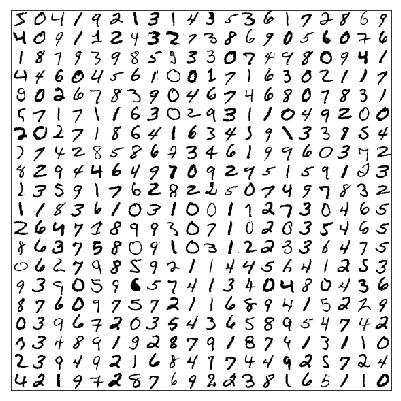

In [1]:
# if using tensorflow, import keras as tf.keras
import numpy as np
#import keras

import tensorflow as tf
from tensorflow import keras

print('keras version:', keras.__version__)

# get mnist data
mnist = keras.datasets.mnist

print('loading MNIST data...')
# using path saves to the ~/.keras/data/path location so it's not downloaded next time
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#show the "shape" of downloaded data
print('train data size:', x_train.shape)
print('train label (expected) value size:', y_train.shape)
print('test data size:', x_test.shape)
print('test expected value:',y_test.shape)

print('\n\ndisplaying few training samples')

#function to copy 1 mage to larger image map
def copy_image(target , ty, tx, src):
    for y in range(28):
        for x in range(28):
            target[ty*28+y][tx*28+x] = src[y][x]
    return target

# show 20 x 20
ysize = 20
xsize = 20
start_offset = 0
base_index = start_offset * (ysize * xsize)

image = np.zeros((28*ysize, 28*xsize), dtype=np.int)

for y in range(ysize):
    for x in range(xsize):
        index = y*xsize + x
        src = x_train[index + base_index]
        image = copy_image(image , y ,x , src)

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image , cmap='gray_r')
plt.show()
plt.close()

### The Artificial Neural Network will implement 1 input layer, 1 hiden layer, and 1 output layer
Since the data is in 28x28, we will convert that into a "flat" 28x28 => 784 array and convert 0-255 integers into 0.0 - 1.0 values (i.e. normalize the data )

And we will "hot encode" single label to be 10 digit array



In [2]:
x_train_reshaped = x_train.reshape(x_train.shape[0],784)
x_test_reshaped = x_test.reshape(x_test.shape[0], 784)

x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

x_train_reshaped /= 255.0
x_test_reshaped /= 255.0

y_hot_train = keras.utils.to_categorical(y_train, num_classes=10)
y_hot_test = keras.utils.to_categorical(y_test, num_classes=10)

### Below sets up the ANN in keras way and makes it ready for use

The input layer is implied => 784 inputs
The hidden layer has 512 nodes
The final output layer has 10 nodes, where each represent the probability of each digit
![sample](ann.png)

In [3]:
model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(512, input_shape=(784,), activation='relu'))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Let's "run" the model against the training data
The model.fit() method trains the model.  The output indicates that after 10 "runs" (or epoch) of the training, you get about 98% accuracy


In [4]:
#train the model with train data
fit_history = model.fit(x_train_reshaped, y_hot_train,
  epochs=25 ,
  batch_size=200,
  validation_data=(x_test_reshaped,y_hot_test)
)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25


InternalError: Blas GEMM launch failed : a.shape=(200, 784), b.shape=(784, 512), m=200, n=512, k=784
	 [[{{node dense/MatMul}}]]
	 [[{{node loss/mul}}]]

### Lets see how the model worked against the "training" data set and the "test" data set.


In [ ]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

### the above diagram indicates that we are "over-fitting" => that the model's accuracy on the training set improves but against the test set, it doesn't improve at all
In fact, if you look at the train accuracy at the last epoch run, it is 100% !!

### Furthermore, the "loss" for the validation slowly creeps up while the "loss" for training goes down consistently.  This is another indication of an "over-fitting"

To remedy this, we will introduce "Dropout" which randomlhy zeros out percentage of connection.


In [ ]:
model2 = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model2.add( keras.layers.Dense(512, input_shape=(784,), activation='relu'))
model2.add( keras.layers.Dropout(rate=0.5))

#output layer
model2.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

In [ ]:
#train the model with train data
fit_history2 = model2.fit(x_train_reshaped, y_hot_train,
  epochs=35 ,
  batch_size=200,
  validation_data=(x_test_reshaped,y_hot_test)
)

In [ ]:
# show procession of training...
plt.plot(fit_history2.history['loss'])
plt.plot(fit_history2.history['val_loss'])
 
plt.title('model2 loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history2.history['acc'])
plt.plot(fit_history2.history['val_acc'])
 
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

#### the model still over fits a little, but it is A LOT better than when no Dropout was used

The validation accuracy is about 0.984 to 0.951. It does not improve

#### Let's plot what's call confusion matrix that shows the mismatched matrix


In [ ]:
my_matrix = np.zeros( (10,10), dtype='int')

# predict for my test data
predictions = model2.predict(x_test_reshaped)

# iterate through 10,000 test data
for i in range(10000):
    guess = np.argmax(predictions[i])
    if guess != y_test[i]:
        # increment [expected][guess] matrix
        my_matrix[y_test[i]][guess] += 1

# show
fig = plt.figure()
plt.xticks( range(10))
plt.yticks( range(10))

for y in range(10):
    for x in range(10):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix, cmap='YlOrRd')
plt.colorbar()
plt.show()
plt.close()

The matrix shows that number 5s are confused as 3s. Let's just plot these problematic 5's

In [ ]:
non_match_list = []
for i in range(10000):
    if y_test[i] == 5:
        guess = np.argmax(predictions[i])
        if guess == 3:
            non_match_list.append(i)

fig = plt.figure( figsize = (9,10))

for i in range(len(non_match_list)):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = non_match_list[i]
    plt.imshow(x_test[index], cmap='gray_r')
plt.show()
plt.close()
